<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b>Independent Component Analysis (ICA)</b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>January 31, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. What is an independent component analysis
<hr style="height:1px;border:none" />

Imagine you have microphones set up at a cocktail party. The audio recordings from these microphones include a mixture of various sounds, originating from various sources, at that party. But, if you have a sufficiently large number of microphones, you can mathematically separate these distinct sources. This is a mathematical problem known as **blind source separation**. An **independent component analysis (ICA)** is one example of such blind source separation methods. In other words, it can separate sources of signals from noisy recordings.

<img style="width: 450px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2018/blob/master/images/ICA_Mixture.png?raw=true" alt="title pics"/>

An ICA is very similar to a PCA, in a sense that both attempt to summarize observed signals in a set of low-dimension components. However there are a couple of main differences:

  * PCA components are *uncorrelated* with each other. ICA components are *statistically independent* from each other. 
  * PCA components can be ordered according to the amount of variability explained. ICA components have no ordering.
 

# 2. Example
<hr style="height:1px;border:none" />

## Data
To demonstrate ICA, we will use a simulated data set with 3 known sources. 

`<SignalDataICA.py>`

In [1]:
%matplotlib inline

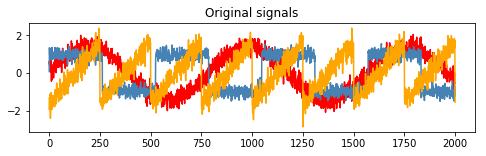

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA


# ######### GENERATING DATA ####################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations


# ########### PLOTTING THE DATA #################
# Original signals
colors = ['red', 'steelblue', 'orange']
plt.figure(figsize=[8,2])
for iSignal in range(3):
    plt.plot(np.arange(1,n_samples+1), S[:,iSignal], color=colors[iSignal])
plt.title('Original signals')
plt.show()

As you can see, the original signal sources are a sinusoid wave, a square wave, and a sawtooth wave. 

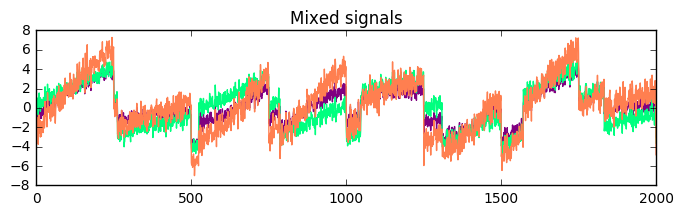

In [4]:
# mixed signals
mcolors = ['purple', 'springgreen','coral']
plt.figure(figsize=[8,2])
for iSignal in range(3):
    plt.plot(np.arange(1,n_samples+1), X[:,iSignal], color=mcolors[iSignal])
plt.title('Mixed signals')
plt.show()

However, when they are mixed together, and recoded from three *virtual* microphones, the original signals may not be apparent.

The original signal sources are not uncorrelated, but their correlations are somewhat attenuated.

In [3]:
# Correlation coefficients, original signals
print(np.corrcoef(S,rowvar=False))

[[ 1.          0.08219193 -0.01996922]
 [ 0.08219193  1.         -0.0673361 ]
 [-0.01996922 -0.0673361   1.        ]]


The mixed signals are highly correlated among themselves due to the shared signal sources.

In [4]:
# Correlation coefficients, mixed signals
print(np.corrcoef(X,rowvar=False))

[[1.         0.88736129 0.96178828]
 [0.88736129 1.         0.7706318 ]
 [0.96178828 0.7706318  1.        ]]


## ICA

For ICA in our example, we will use a transformation object **`FastICA`** under **`sklern.decompositon`**. Now, we shall apply an ICA to the simulated data described above. Here, we specify the number of components **`n_components=3`**.

In [5]:
# ######### ICA FIRST #########################
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)  

And let's plot the resulting ***ICs*** (***independent components***). 

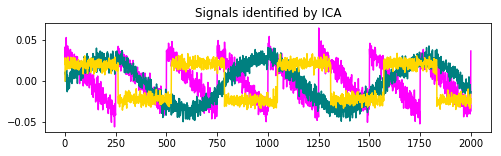

In [6]:
# plotting ICs
pcolors = ['fuchsia','teal','gold']
plt.figure(figsize=[8,2])
for iSignal in range(3):
    plt.plot(np.arange(1,n_samples+1), X_ica[:,iSignal], color=pcolors[iSignal])
plt.title('Signals identified by ICA')
plt.show()

As you can see, the original signals are recovered. Since ICs do not have any ordering, you need to have some knowledge about the underlying signals in order to interpret ICA results.

As a comparison, we also run a PCA with the same data, and the same number of components.

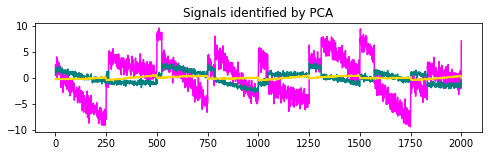

In [7]:
# ######### PCA NEXT #########################
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)  

# plotting PCs
pcolors = ['fuchsia','teal','gold']
plt.figure(figsize=[8,2])
for iSignal in range(3):
    plt.plot(np.arange(1,n_samples+1), X_pca[:,iSignal], color=pcolors[iSignal])
plt.title('Signals identified by PCA')
plt.show()


As you can see, PCs do not resemble the original signal source. Thus, in this type of data, running an ICA may be more appropriate.

# 3. Application
<hr style="height:1px;border:none" />

## Data
Here is another example to demonstrate the utility of an ICA. The data set (stored in **`StockMarket.csv`**) consists of stock indices from Jan 2009 to Feb 2011 from various stock markets around the globe:

  * **`ISE`**: Istanbul Stock Exchange
  * **`SP`**: Standard & Poor 500 Index (US)
  * **`DAX`**: DAX (Deutscher Aktienindex) (Germany)
  * **`FTSE`**: Financial Times Stock Exchange (UK)
  * **`NIKKEI`**: Nikkei Index (Japan)
  * **`BOVESPA`**: Indice Bovespa (Brazil)
  * **`EU`**: Morgan Stanley Capital International (MSCI) European Index
  * **`EM`**: Morgan Stanley Capital International (MSCI) Emerging Markets Index
  
<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;">Source: https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE</p>
  
These features are in terms of daily returns (change in the index from the previous day, divided by the price from the previous day) so these features are roughly in the same scale. Here is the plot of the data for the first 60 days.

`<StockMarketICA.py>`

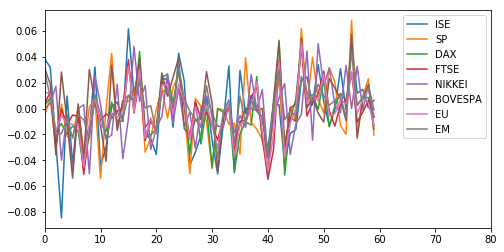

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA,PCA

# loadin the data
stockData = pd.read_csv('StockMarket.csv')
stockX = np.array(stockData.iloc[:,1:])   # Data 
stockFeature = np.array(stockData.columns[1:])  # Feature names

# plotting the data
plt.figure(figsize=[8,4])
for i in range(8):
    plt.plot(stockX[:60,i], label = stockFeature[i])
plt.xlim([0,80])
plt.legend()
plt.show()

As you can see, these indices seem to follow the same trend. Some of the spikes seem to line up.

## Number of components

Before we can apply an ICA to this data set, we need to determine the number of components to be used in the ICA. To do so, we apply a PCA to the same data set. Then determine the number of components that explain a sufficiently large portion of variability. In this case, let's say we want to capture 90% or more variability. So, first we apply a PCA.

In [9]:
# PCA first to determine the number of components
pca = PCA()
stockPC = pca.fit_transform(stockX)

### Exercise
1. **Cumulative from PCA**. Generate a plot of the cumulative explained variance resulting from the PCA above. Determine the number of components that explain at least 90% of variability.
2. **Run an ICA**. Run an ICA with the number of components determined in the PCA. Save the number of components in a variable **`nIC`** to be used later.

Now let's plot the ICs. 

In [ ]:
# plotting the ICs
plt.figure(figsize=[8,4])
for iIC in range(nIC):
    plt.plot(stockIC[:60,iIC], label = 'IC ' + str(iIC+1))
plt.xlim([0,80])
plt.legend()
plt.show()

Compared to the original data, do these ICs seem to capture the variability in the data?